In [7]:
import pyipn
from pyipn.io import import_lc
from pyipn.io.orbits import tle
from pyipn.geometry import Location
import pdb

import h5py
from astropy.coordinates import SkyCoord, CartesianRepresentation
from astropy.time import Time, TimeDelta
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [8]:
tle_G = 'GLAST2018_01_01 00_00_00__2018_12_31 00_00_00_tle.txt'
ran = np.linspace(-2., 2., num=40)

with h5py.File(r"C:\Users\singh\pythonprojects\data\lc\GBM_TRIGDAT\gbm_trigdat.hdf5", 'r') as f:
    offset=[]
    #randiff = []
    #for j in ran:
    differences =[]
    for grp in f:
        grp = f[grp]
        loc = grp['position'][0]
        trigtime = Time.strptime(grp.attrs['trigtime'], '%Y-%m-%d_%H:%M:%S.%f')
        start = Time.strptime(grp.attrs['start_utc'], '%Y-%m-%d_%H:%M:%S.%f')+TimeDelta(4., format='sec')
        start_dt = start.to_datetime()
        skycoord = SkyCoord(x=loc[0], y=loc[1], z=loc[2], representation_type="cartesian", unit="km", frame='gcrs')
        loc_trigdat = skycoord.transform_to('gcrs')
        tle_pos = tle.position_skyfield(start_dt, tle_G)
        loc_tle = SkyCoord(x=tle_pos[0], y=tle_pos[1], z=tle_pos[2], representation_type="cartesian", unit="km", frame='gcrs')

#         aran = []
#         for j in ran:
#             start_dtj = start_dt + dt.timedelta(seconds=j)
#             tlej_pos = tle.position_skyfield(start_dtj, tle_G)
#             loc_tlej = SkyCoord(x=tlej_pos[0], y=tlej_pos[1], z=tlej_pos[2], representation_type="cartesian", unit="km", frame='gcrs')
#             aran.append(np.linalg.norm(loc_trigdat.cartesian.xyz.value-loc_tlej.cartesian.xyz.value))

#         aran = np.array(aran)

        #line1, line2 = tle.find_closest_epoch(start_dt, tle_G)
        #elem = line1.split()
        #t=float(elem[3][2:])-1.
        #epoch = Time(dt.datetime(2018,1,1,0,0,0), format='datetime', scale='ut1') + TimeDelta(t, format='jd', scale='ut1')
        #dt_ = epoch.to_datetime() - start_dt

        #print(start_dt - epoch.to_datetime())
        #print('trigdat: '+str(loc_trigdat.represent_as(CartesianRepresentation).xyz))
        #print('tle:     '+str(loc_tle.cartesian.xyz))
        
        difference = np.linalg.norm(loc_trigdat.cartesian.xyz.value-loc_tle.represent_as(CartesianRepresentation).xyz.value)
        print('difference: '+str(difference)+' km')

        differences.append(difference)
        #print('time offset where tle and trigdat match best: '+str(ran[np.argmin(aran)]))
        #offset.append(ran[np.argmin(aran)])
        #print(np.min(aran))
        #plt.plot(ran, aran)
        #plt.axvline(x=dt_.total_seconds())
        #plt.show()
        print("")

    differences = np.array(differences)
    offset = np.array(offset)
        #randiff.append(np.sum(differences))
    #randiff=np.array(randiff)
    #print(randiff)

difference: 9.180065302785717 km

difference: 3.4351278407638404 km

difference: 13.094704943559325 km

difference: 13.687395297955373 km

difference: 3.0841310640164474 km

difference: 3.362209743824932 km

difference: 0.31386413353892584 km

difference: 9.967178780890858 km

difference: 10.64603995804589 km

difference: 5.695267263210205 km

difference: 7.411875105612078 km

difference: 6.36371111973213 km

difference: 3.4074498225539993 km

difference: 6.581396225293356 km

difference: 5.144405144229954 km

difference: 1.3732690024991372 km

difference: 7.634164108578016 km

difference: 1.8969268688609142 km

difference: 7.468421080281194 km

difference: 4.3885638768252875 km

difference: 7.375119392331568 km

difference: 2.5446094990349866 km

difference: 6.056840873968655 km

difference: 9.331664567238272 km

difference: 10.45307406739849 km

difference: 9.275794177295877 km

difference: 10.252082876280914 km

difference: 4.566359133270889 km

difference: 13.431097178839382 km

di

difference: 8.899291957318898 km

difference: 11.974748748988596 km

difference: 14.408019425902964 km

difference: 14.4777988388609 km

difference: 8.605969833847281 km

difference: 2.4928784367557 km

difference: 15.918784461183082 km

difference: 1.886621071448318 km

difference: 8.948838821634347 km

difference: 14.285286436884013 km

difference: 19.7114467126038 km

difference: 14.441947550037975 km

difference: 18.33235760774733 km

difference: 18.1604609707016 km

difference: 8.858787853143014 km

difference: 4.3688826246242085 km

difference: 19.35013443822082 km

difference: 23.254294317148055 km

difference: 6.4377524250605545 km

difference: 22.415558990132173 km

difference: 6.93561251509695 km

difference: 7.774007826328527 km

difference: 11.098890004967446 km

difference: 23.51420281192339 km

difference: 21.08648573614528 km

difference: 24.211578304578694 km

difference: 9.536551951695895 km

difference: 23.20167941257522 km

difference: 21.870477192357477 km

differen

<IPython.core.display.Javascript object>


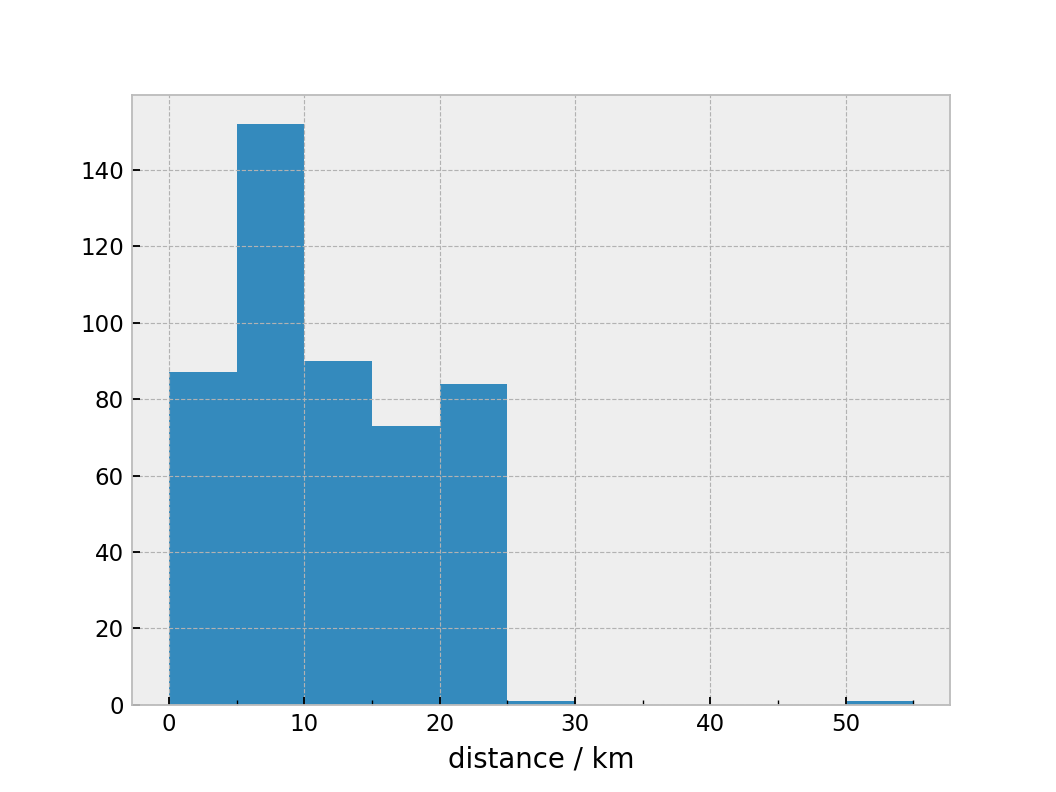

In [9]:
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

plt.style.use('bmh')
%matplotlib notebook
bins = np.arange(0., 60., 5)

fig, axs = plt.subplots()
axs.hist(differences, bins=bins)
axs.set_xlabel('distance / km')
axs.xaxis.set_major_locator(MultipleLocator(10))
axs.xaxis.set_minor_locator(AutoMinorLocator(2))
fig.savefig('locationuncert_glast.pdf')

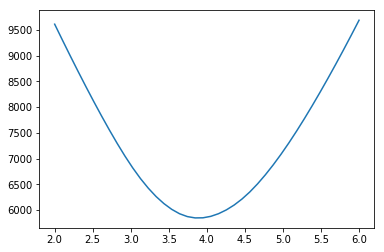

3.846153846153846


In [37]:
plt.plot(ran+4., randiff)
plt.show()
print(ran[np.argmin(randiff)]+4)